<a href="https://colab.research.google.com/github/ggauravuee/image-classifier/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict stock price using the AI


In [1]:


import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,170.369385
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,169.736588
2018-01-09,175.059998,173.410004,174.550003,174.330002,21584000.0,169.717117
2018-01-10,174.300003,173.000000,173.160004,174.289993,23959900.0,169.678162
2018-01-11,175.490005,174.490005,174.589996,175.279999,18667700.0,170.641968


In [2]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


In [3]:
df.shape

(2021, 6)

In [4]:
close_price = df['Adj Close']
mavg = close_price.rolling(window = 100).mean()
mavg.head()
print(" Last 10 moving average")
mavg.tail(10)

 Last 10 moving average


Date
2017-12-28    159.204700
2017-12-29    159.305436
2018-01-02    159.426200
2018-01-03    159.596242
2018-01-04    159.753119
2018-01-05    159.906184
2018-01-08    160.035946
2018-01-09    160.171818
2018-01-10    160.337276
2018-01-11    160.515863
Name: Adj Close, dtype: float64

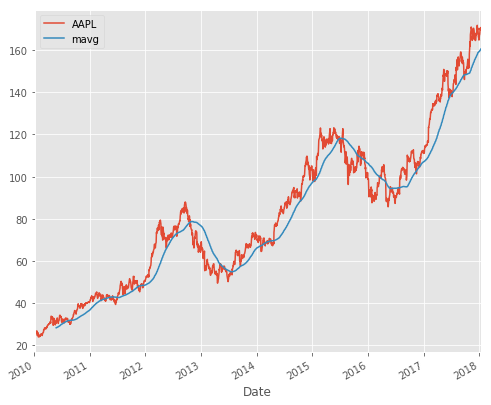

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_price.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

#Return Deviation — to determine risk and return

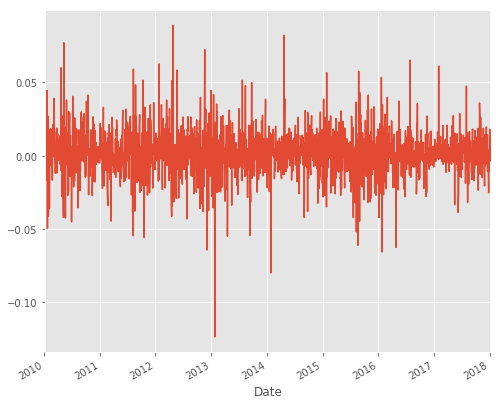

In [6]:
rets = close_price / close_price.shift(1) - 1
rets.plot(label='return')

# Analysing your Competitors Stocks

In [7]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT', 'AMZN', 'NFLX'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,AMZN,GE,GOOG,IBM,MSFT,NFLX
Date,,,,,,,
2018-01-05,170.369385,1229.140015,17.281342,1102.229980,150.095444,85.716881,209.990005
2018-01-08,169.736588,1246.869995,17.038992,1106.939941,151.000687,85.804337,212.050003
2018-01-09,169.717117,1252.699951,17.299984,1106.260010,151.333221,85.746025,209.309998
2018-01-10,169.678162,1254.329956,17.644865,1102.609985,151.656525,85.357239,212.520004
2018-01-11,170.641968,1276.680054,17.728752,1105.520020,151.675003,85.609947,217.240005


In [8]:
# Correlation Analysis — Does one competitor affect others?
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr.tail(7)


Symbols,AAPL,AMZN,GE,GOOG,IBM,MSFT,NFLX
Symbols,,,,,,,
AAPL,1.000000,0.339084,0.348559,0.416191,0.354542,0.396283,0.160360
AMZN,0.339084,1.000000,0.327030,0.522886,0.321861,0.419286,0.336872
GE,0.348559,0.327030,1.000000,0.386837,0.499171,0.429622,0.166896
GOOG,0.416191,0.522886,0.386837,1.000000,0.380120,0.480058,0.261038
IBM,0.354542,0.321861,0.499171,0.380120,1.000000,0.465419,0.151975
MSFT,0.396283,0.419286,0.429622,0.480058,0.465419,1.000000,0.201534
NFLX,0.160360,0.336872,0.166896,0.261038,0.151975,0.201534,1.000000


Text(0, 0.5, 'Returns GE')

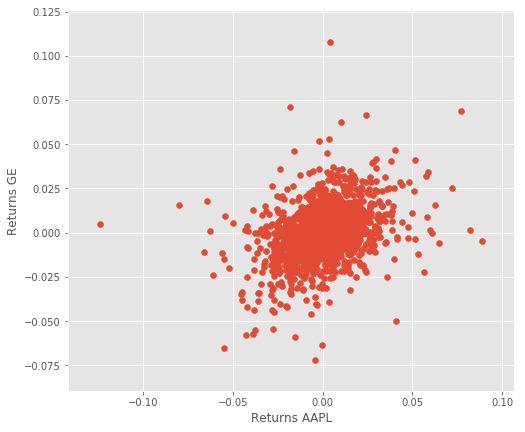

In [9]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel(xlabel='Returns AAPL')
plt.ylabel(ylabel='Returns GE')

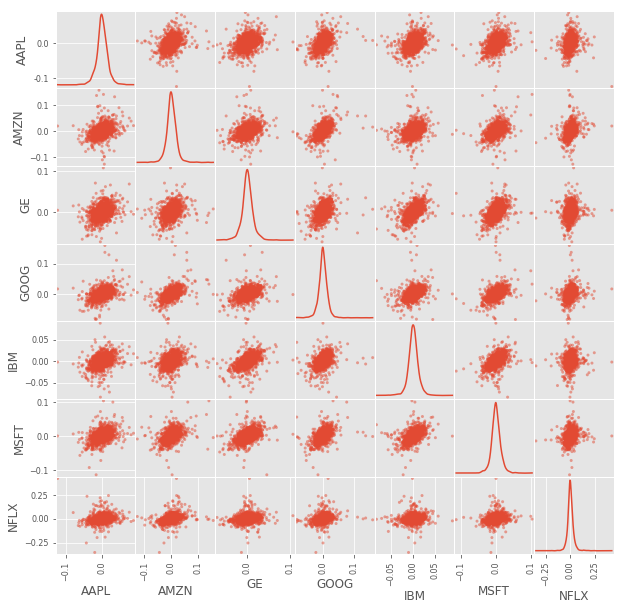

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

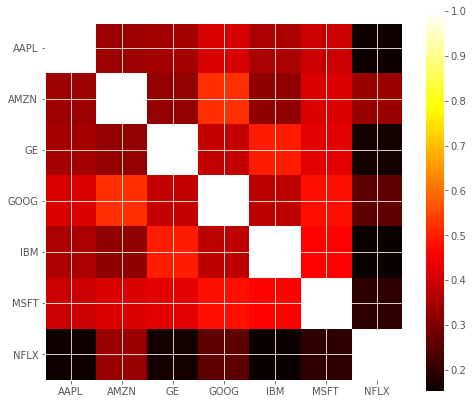

In [11]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

#Predicting Stocks Price


In [0]:
# feature engineering
# engineer some features: High Low Percentage and Percentage Change.
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [0]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing

# drop missing value ????
# why can't we take moving average for missing value
dfreg.fillna(value = -99999, inplace = True)

# seperate 1% of data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

#forecast_col = 'Adj Close'
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'

dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# scale X for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]


# Model Generation — Where the prediction fun starts


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_validate


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split ##CORRECTION: was missing and messing up our X_train data later

In [20]:
#CORRECTION: DEFINING X_train before we use it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

#KNN regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

# Evaluation
A simple quick and dirty way to evaluate is to use the score method in each trained model. The score method finds the mean accuracy of self.predict(X) with y of the test data set.

In [24]:
#let's evaluate all of the models against eachother
confidencereg = clfreg.score(X_test,y_test)
confidencepoly2 = clfpoly2.score(X_test, y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression confidence is', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

#printing some of the stocks forecasts
forecast_set_reg = clfreg.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
forecast_set_poly2 = clfpoly2.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
forecast_set_poly3 = clfpoly3.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
forecast_set_knn = clfknn.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES

print('Forcasted values of future stock prices i.e. X_lately')
print('Forecasted value using Lin reg', forecast_set_reg)

dfreg['Forecast'] = np.nan

The linear regression confidence is 0.974474883449799
The quadratic regression 2 confidence is  0.9715465195135059
The quadratic regression 3 confidence is  0.9708506359405786
The knn regression confidence is  0.9496357738706722
Forcasted values of future stock prices i.e. X_lately
Forecasted value using Lin reg [168.72358852 169.25323947 169.26690648 170.64731805 173.34823825
 171.33105147 171.28037068 172.06010812 172.03105369 167.46287356
 167.71944918 168.25876247 166.18381267 169.52228008 169.17852825
 170.06122953 172.09065209 171.34371366 171.28482715 171.29355289
 172.28430636]


In [0]:
#Plotting the forecast with existing historical data so we can compare it to future price movements

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_reg: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [0]:
for i in forecast_set_poly2: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

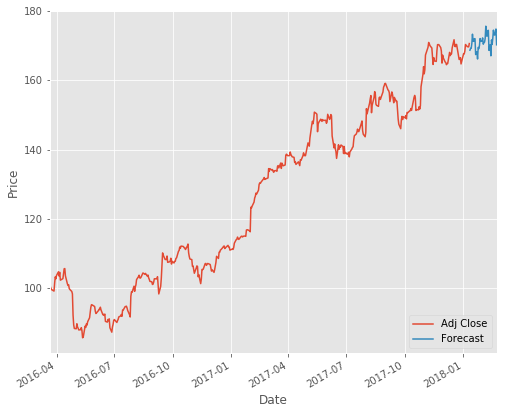

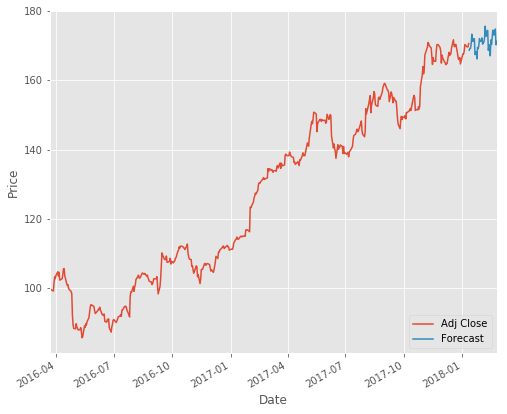

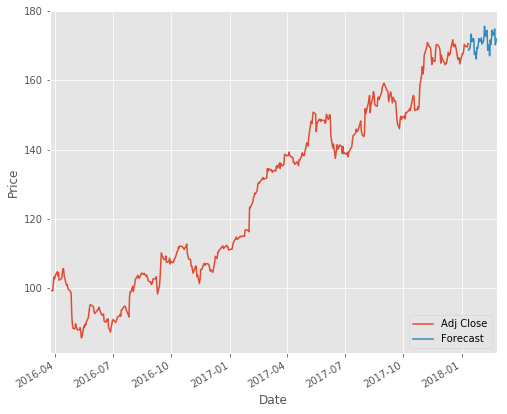

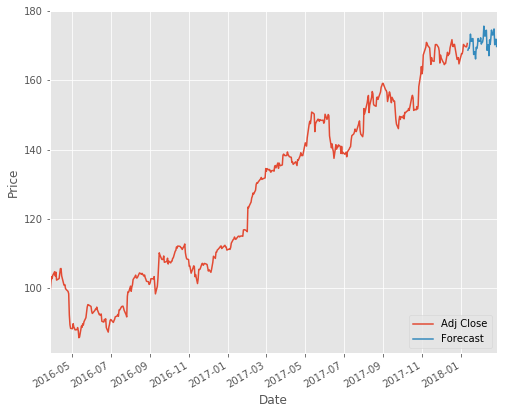

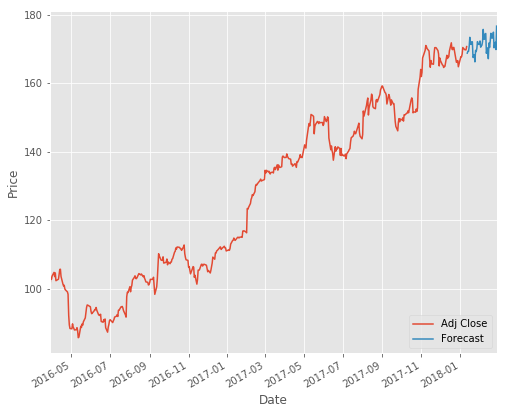

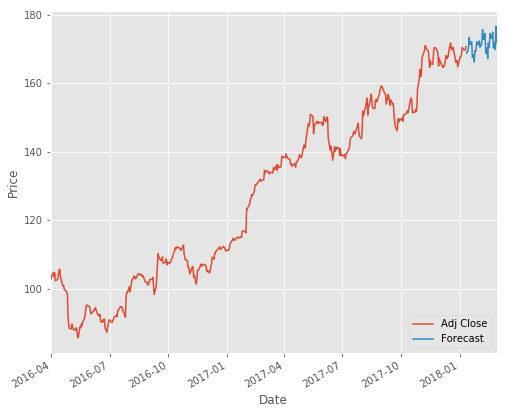

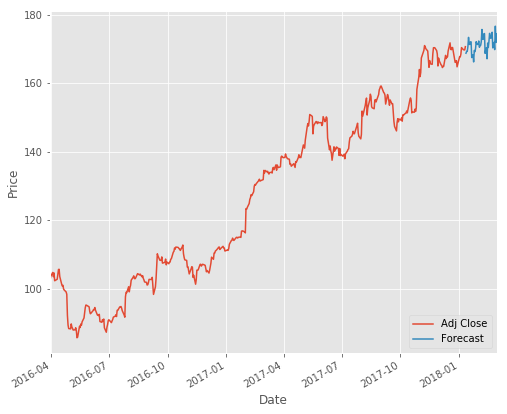

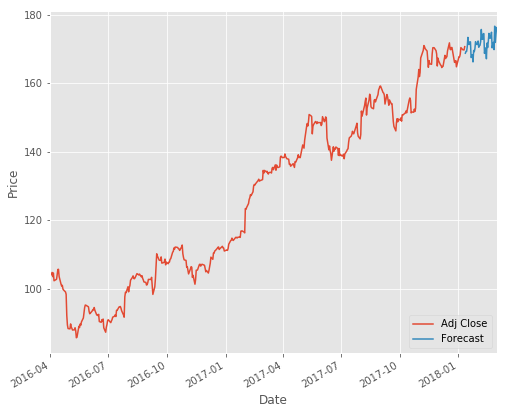

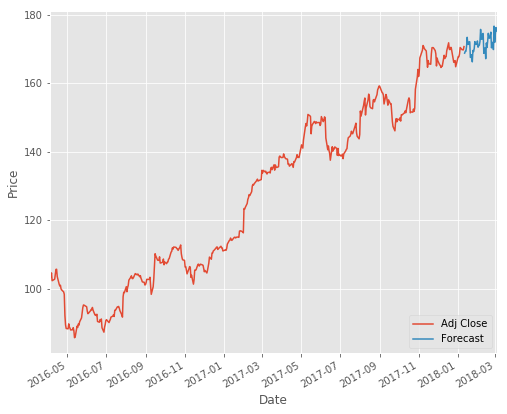

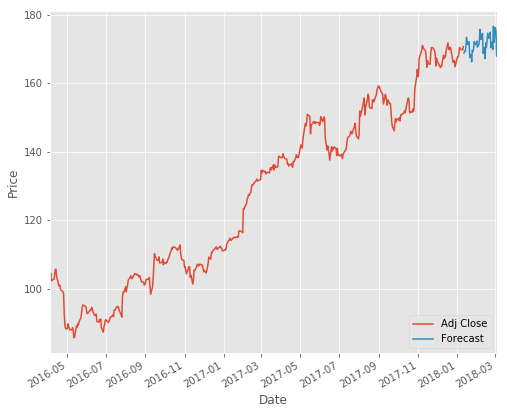

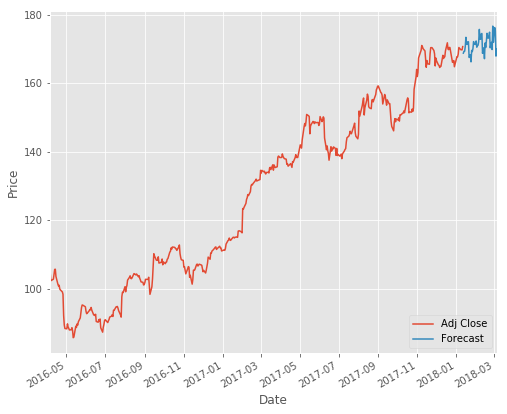

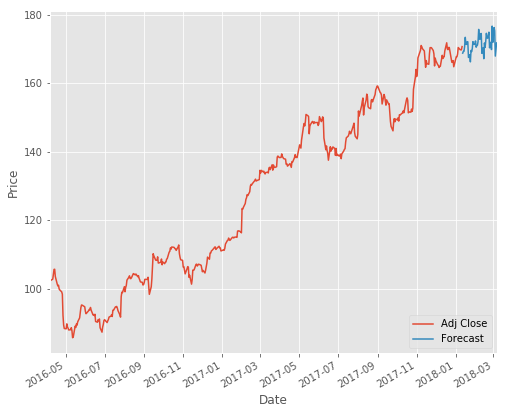

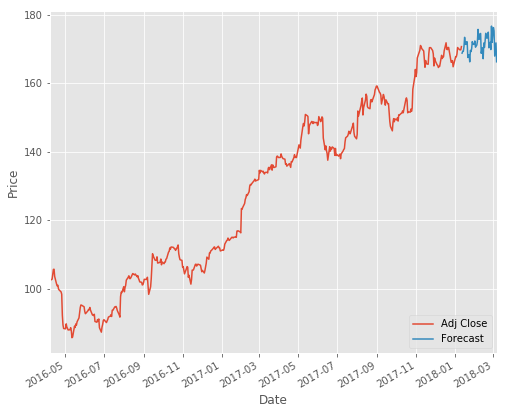

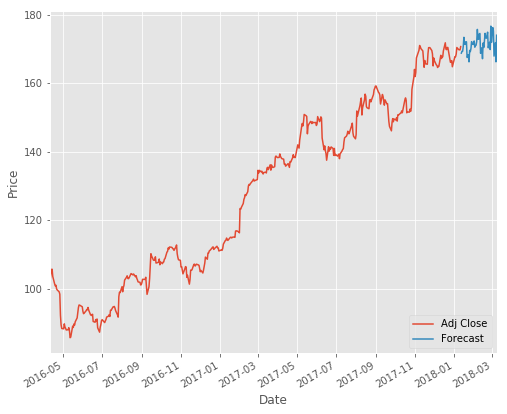

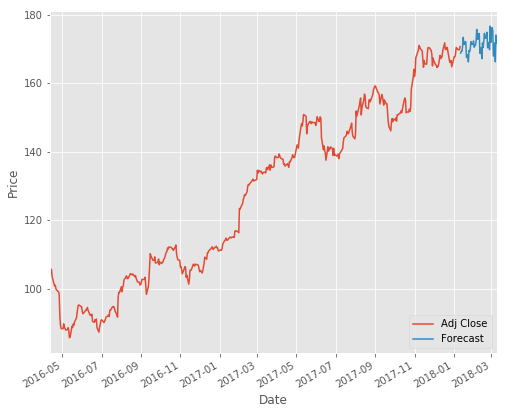

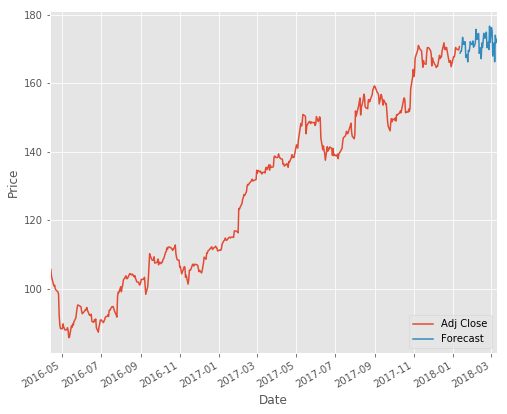

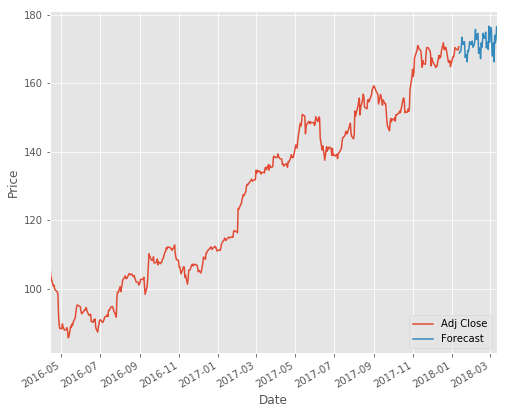

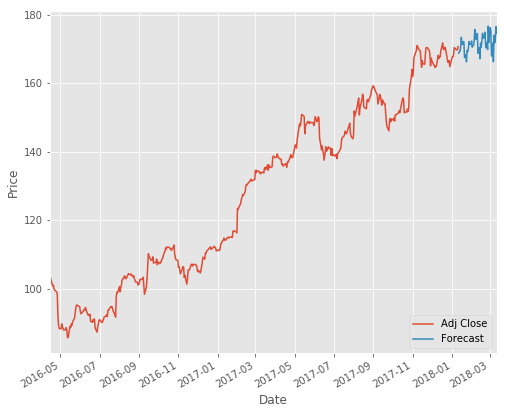

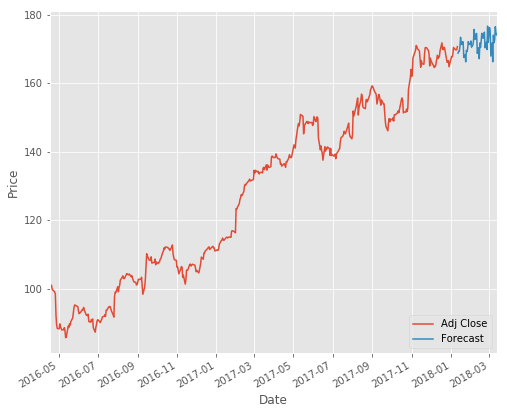

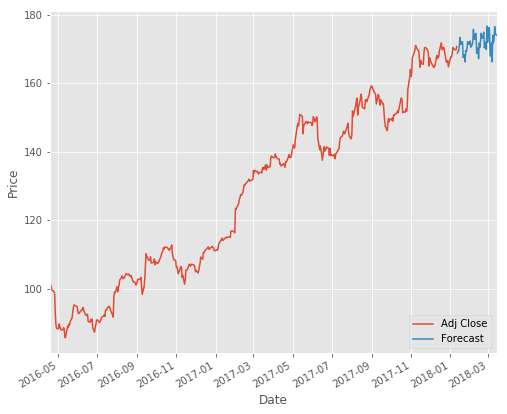

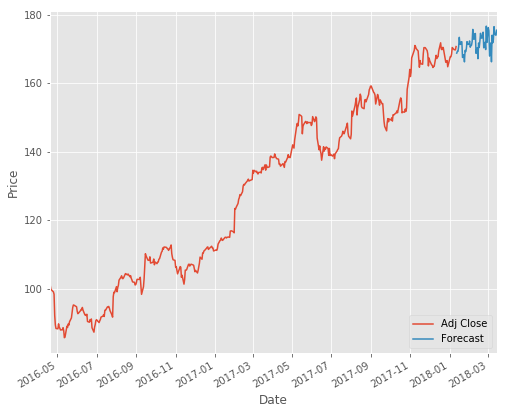

In [27]:
for i in forecast_set_poly3: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()